In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

# I want my data frame to only show two decimal places for the number, so I change the display format:
pd.options.display.float_format = "{:,.2f}".format

In [77]:
df= pd.read_csv("Heart Attack.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [78]:
print(df.shape)
df.describe()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [79]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [80]:
# Finding Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("\n")
print('Number of numerical variables: {}\nThey are :'.format(len(numerical_features)))
for f in numerical_features:
    print("    ",f)
    



Number of numerical variables: 14
They are :
     age
     sex
     cp
     trtbps
     chol
     fbs
     restecg
     thalachh
     exng
     oldpeak
     slp
     caa
     thall
     output


In [81]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
df[numerical_with_nan].isnull().sum()


NameError: name 'numerical_with_nan' is not defined

In [82]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print(df[categorical_features].head())


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


### Since the above cell returns empty list => our dataset doesn't contain any categorical variable

In [83]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']
print("Features with nan",features_nan)

for feature in features_nan:
    check = feature,np.round(df[feature].isnull().mean(),4)
    if check > 0 :
        print("{}: {}% missing values".format(check))
    else:
        print("Data is clean")
        
    

Features with nan []


In [84]:
# Output is Empty list because we don't have any missing value in the entire dataset.

In [85]:
df.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.40,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.30,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.00,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.60,2,0,2,1


In [86]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 9


In [87]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
# visualise the Continuous variables
df[continuous_feature].head()

Continuous feature Count 5


,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.30
1,37,130,250,187,3.50
2,41,130,204,172,1.40
3,56,120,236,178,0.80
4,57,120,354,163,0.60


In [88]:
max_threshold= df['chol'].quantile(0.99)
max_threshold

406.74000000000024

In [89]:
min_threshold = df['chol'].quantile(0.03)
min_threshold


167.06

In [90]:
df_no_outliers= df[(df['chol']>min_threshold) & (df['chol']<max_threshold)]
df_no_outliers

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.00,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0


In [91]:
print("Total Outliers Removed :",df.shape[0]-df_no_outliers.shape[0])

Total Outliers Removed : 14


<Figure size 1080x720 with 0 Axes>

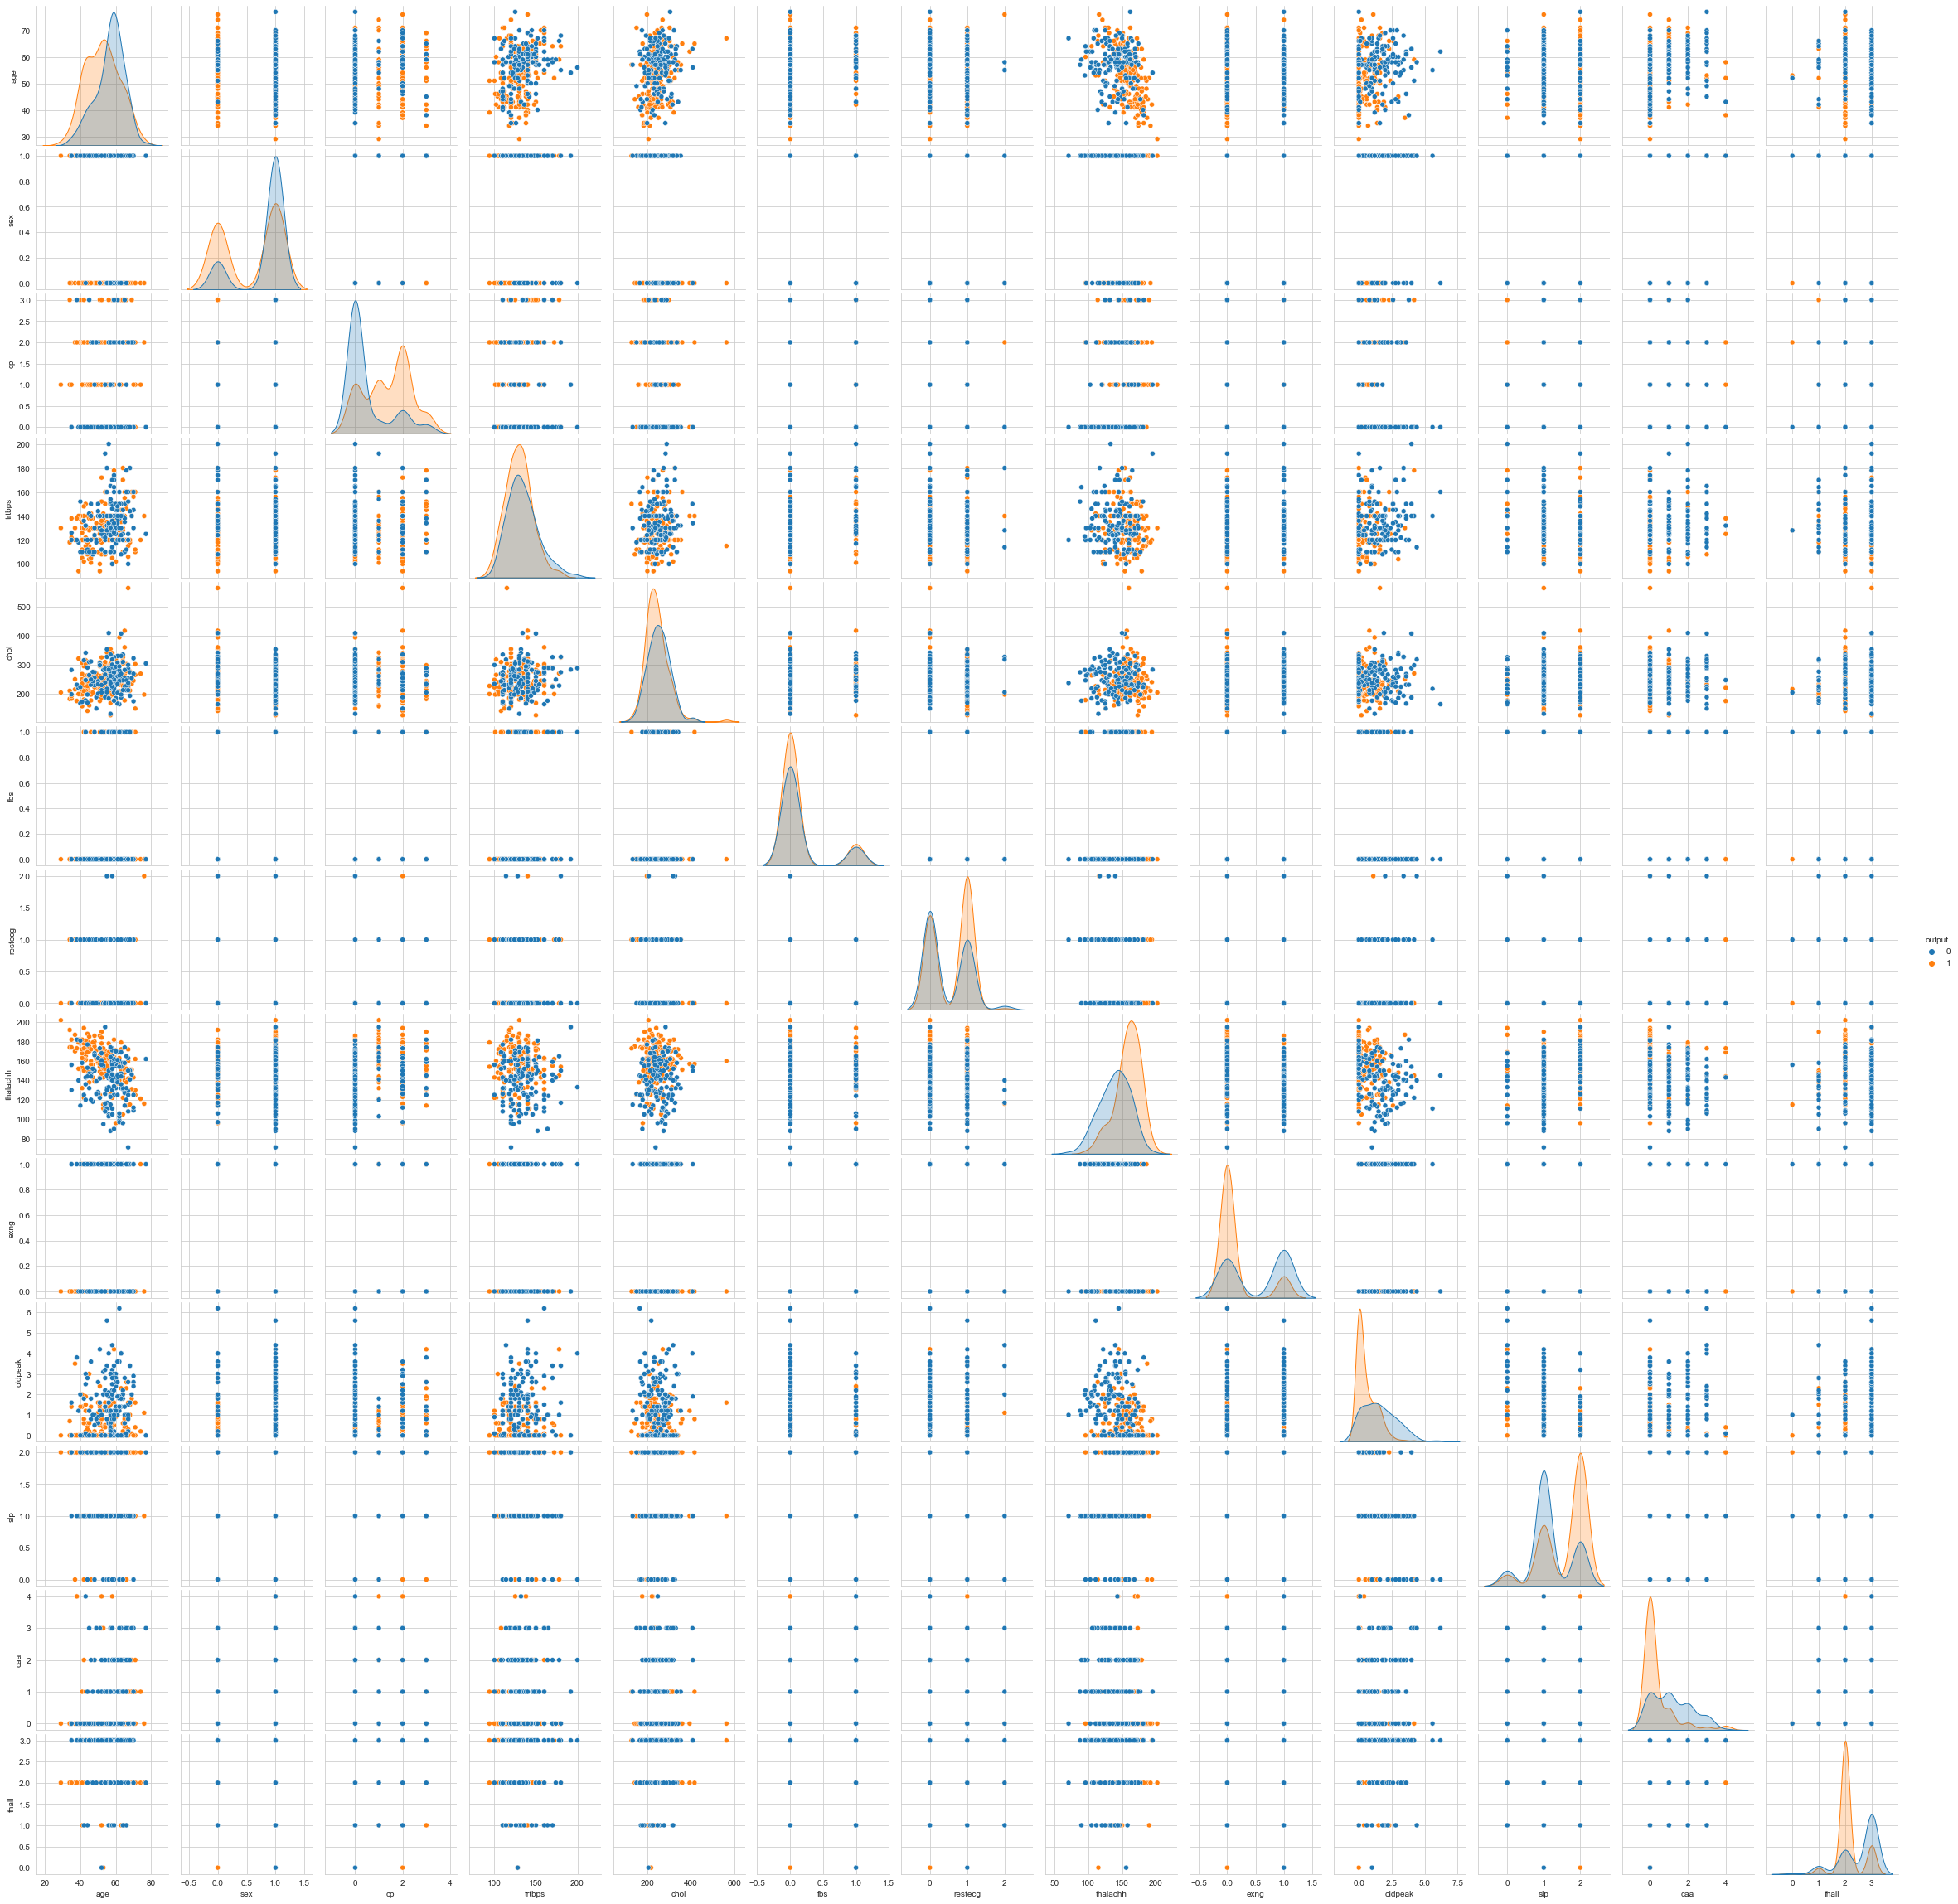

In [92]:
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
sns.set_style("whitegrid");
sns.pairplot(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']], hue="output")
plt.show()

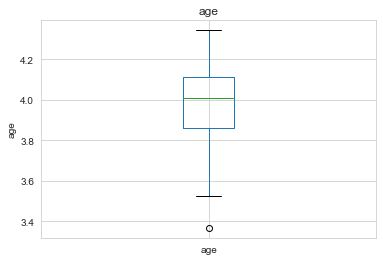

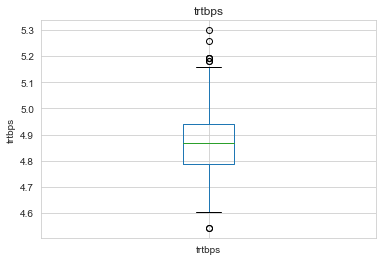

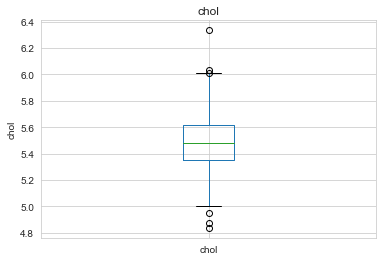

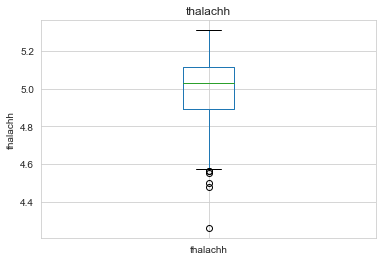

In [93]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

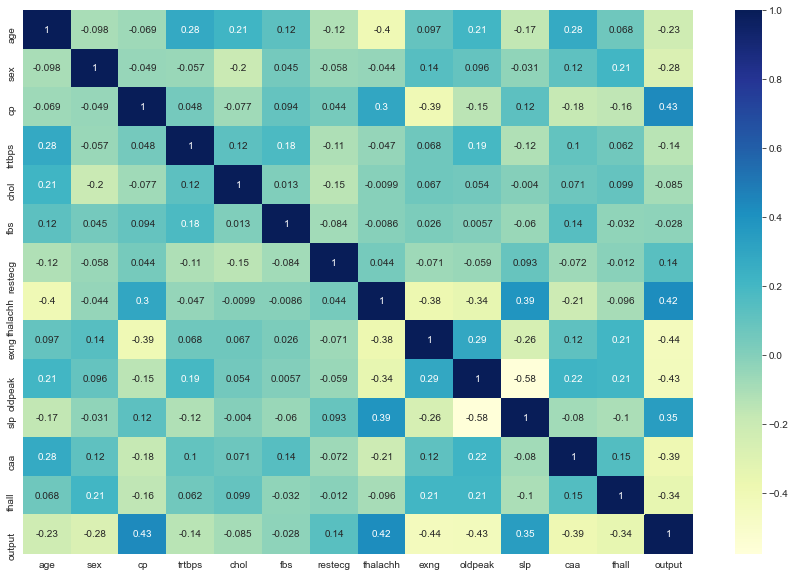

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

<AxesSubplot:xlabel='output', ylabel='count'>

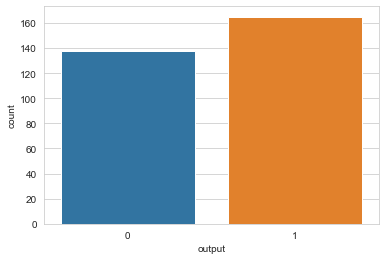

In [94]:
import warnings 
warnings.filterwarnings('ignore')
sns.countplot(df["output"],data = df)

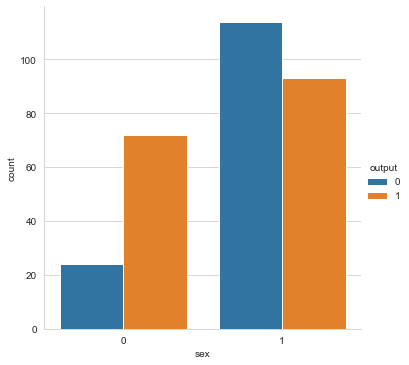

In [95]:
sns.catplot(x ="sex", hue ="output",kind ="count", data = df)
sns.set_style("whitegrid")

<AxesSubplot:xlabel='output', ylabel='cp'>

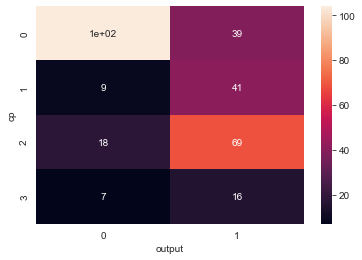

In [96]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['cp', 'output'])
age_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(age_survived, annot = True)

<AxesSubplot:xlabel='thall', ylabel='chol'>

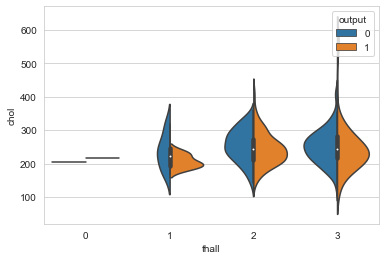

In [97]:
sns.set_style("whitegrid");
sns.violinplot(x ="thall", y ="chol", hue ="output",
data = df, split = True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


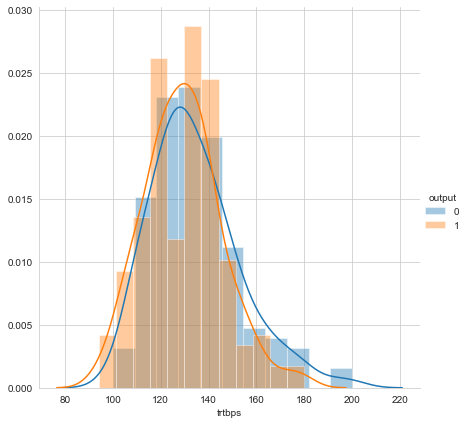

In [100]:
sns.FacetGrid(data, hue="output", size=6).map(sns.distplot, "trtbps").add_legend()
plt.show()

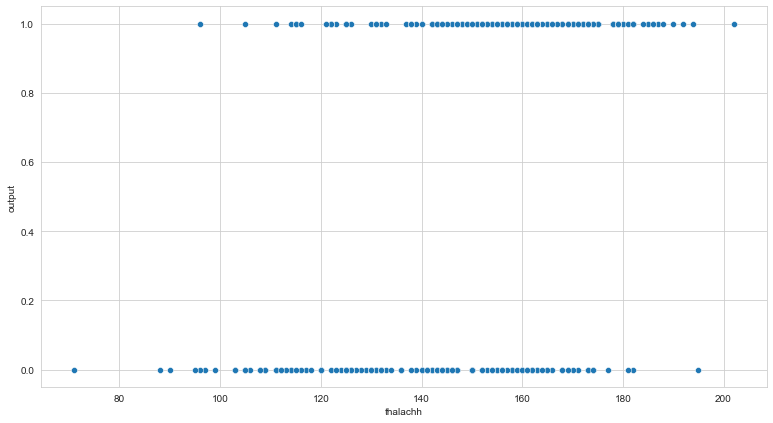

In [102]:
plt.subplots(figsize=(13, 7))
sns.scatterplot(x=df['thalachh'], y=df['output']);

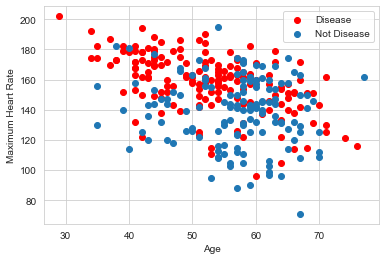

In [103]:
plt.scatter(x=df.age[df.output==1], y=df.thalachh[(df.output==1)], c="red")
plt.scatter(x=df.age[df.output==0], y=df.thalachh[(df.output==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

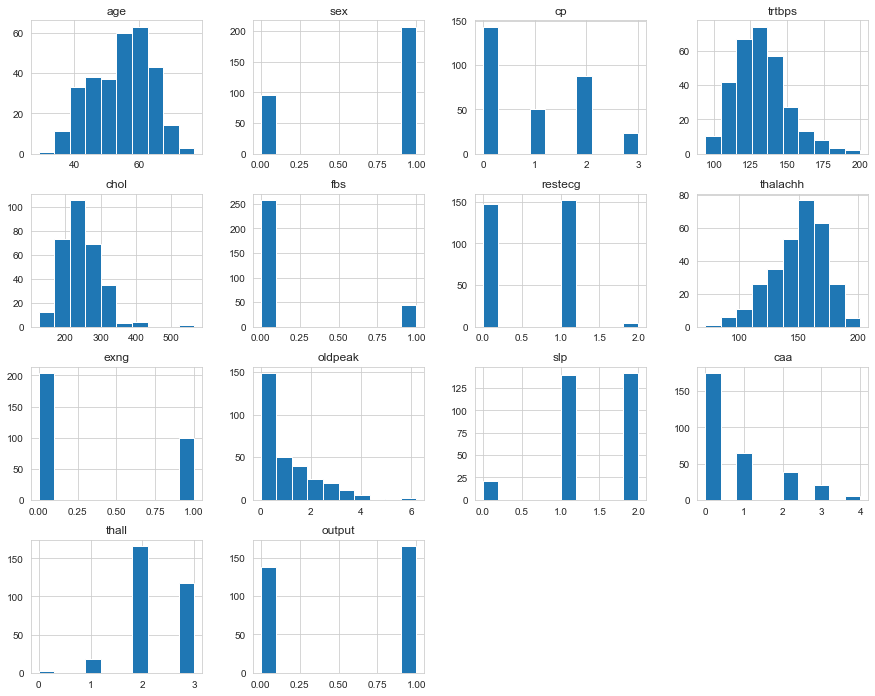

In [104]:
df.hist(figsize = (15, 12))
plt.show()

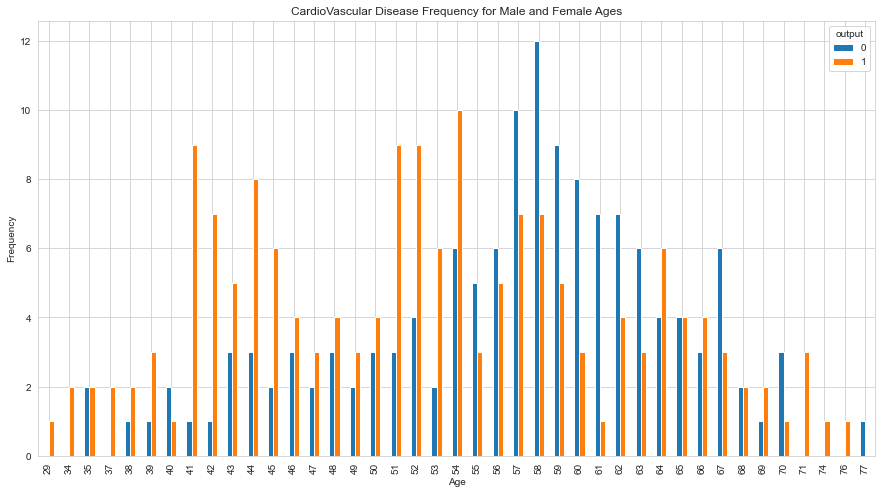

In [105]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(15,8))
plt.title('CardioVascular Disease Frequency for Male and Female Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

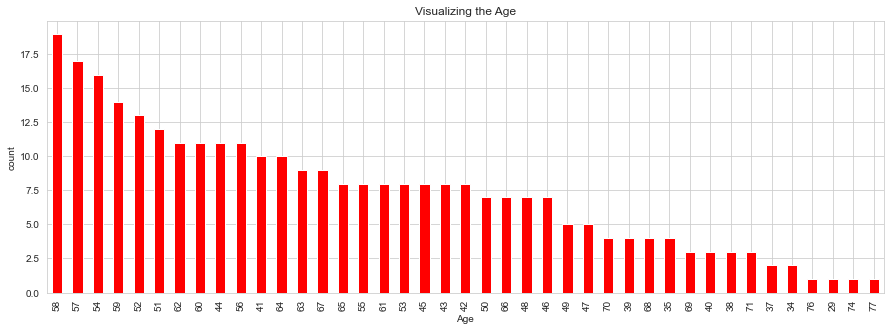

In [29]:
# visualising the Age in the dataset
plt.subplots(figsize=(15,5))
df['age'].value_counts(normalize = True)
df['age'].value_counts(dropna = False).plot.bar(color = 'Red')
plt.title('Visualizing the Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

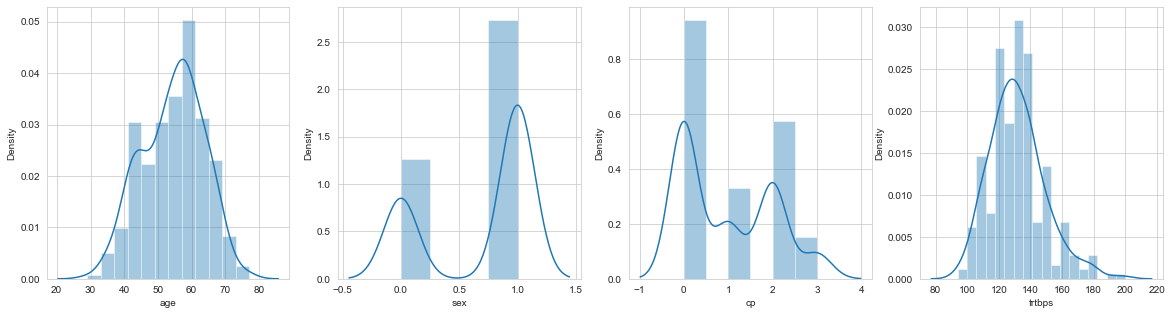

In [43]:
plt.subplots(figsize=(20,5))
plt.subplot(1, 4, 1)
sns.distplot(df['age'])

plt.subplot(1, 4, 2)
sns.distplot(df['sex'])

plt.subplot(1, 4, 3)
sns.distplot(df['cp'])

plt.subplot(1, 4, 4)
sns.distplot(df['trtbps'])

plt.show()